In [73]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import alpha 
%matplotlib inline

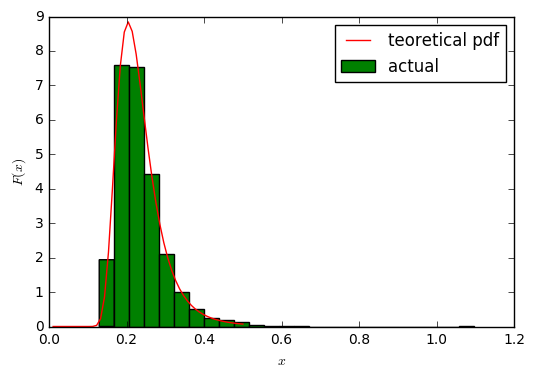

In [74]:
alp = 4.5

alpha_rv = alpha(alp)# используем альфа-распределение из scipy.stats
sample_data = alpha_rv.rvs(1000)# генерация случайных чисел

x = np.linspace(0,0.5, 50)
pdf = alpha.pdf(x, alp)# функция плотности вероятности
#Далее идет построение графика 
plt.plot(x, pdf, label = 'teoretical pdf', c= 'r')
plt.hist(sample_data, bins=25, normed=True, color='g',label='actual')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')


In [75]:
mu_teor = alp**-1
var_teor = alp**-2
sigma_teor = math.sqrt(alp**-2)
print 'Теоретическое среднее               : {:.2f}'.format(mu_teor)
print 'Теоретическая дисперсия             : {:.2f}'.format(var_teor)
print 'Теоретическое стандартное отклонение: {:.2f}'.format(sigma_teor)

Теоретическое среднее               : 0.22
Теоретическая дисперсия             : 0.05
Теоретическое стандартное отклонение: 0.22


In [76]:
# функция generate осуществляет генерацию 1000 выборок объемом N 
def generate(sample, n_sample):
    means = []
        
    for i in range(1000):
        means.append((alpha_rv.rvs(size=5)).mean())
    
    mu = np.mean(means)
    sigma = np.std(means,ddof=1)
    SE = sigma_teor/math.sqrt(n_sample) 
    
    norm_rv = sts.norm(mu_teor,SE)
    
    plt.hist(means, bins=20, normed=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),lw=3, label='teoretical')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$F(x)$')
    
    print 'Сравнение параметров теоретических средних с приближенными параметрами нормальных распределений при N = {0}'.format(n_sample)
    print 'Теоретическое среднее и приближенное                    : {:.2f} - {:.2f}'.format(mu_teor, mu)
    print 'Теоретическое стандартное отклонение и приближенное     : {:.2f} - {:.2f}'.format(sigma_teor, SE)
    print 'Теоретическое мат ожидание и стандартная ошибка среднего: {:.2f} +/- {:.2f}'.format(mu, 2*SE)


Сравнение параметров теоретических средних с приближенными параметрами нормальных распределений при N = 5
Теоретическое среднее и приближенное                    : 0.22 - 0.24
Теоретическое стандартное отклонение и приближенное     : 0.22 - 0.10
Теоретическое мат ожидание и стандартная ошибка среднего: 0.24 +/- 0.20


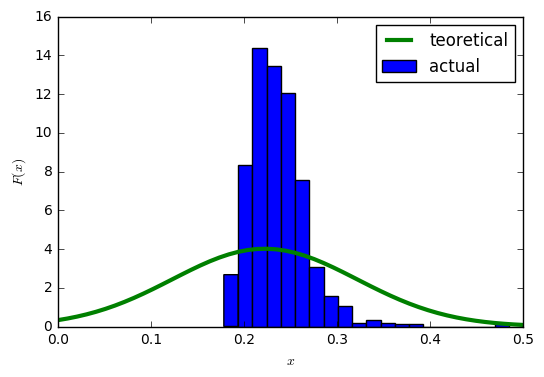

In [77]:
generate(sample_data,5)

Сравнение параметров теоретических средних с приближенными параметрами нормальных распределений при N = 10
Теоретическое среднее и приближенное                    : 0.22 - 0.23
Теоретическое стандартное отклонение и приближенное     : 0.22 - 0.07
Теоретическое мат ожидание и стандартная ошибка среднего: 0.23 +/- 0.14


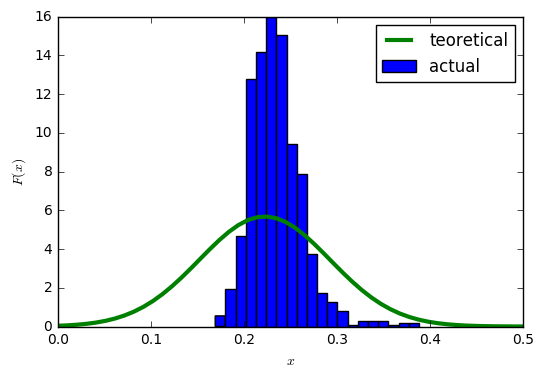

In [78]:
generate(sample_data,10)

Сравнение параметров теоретических средних с приближенными параметрами нормальных распределений при N = 30
Теоретическое среднее и приближенное                    : 0.22 - 0.24
Теоретическое стандартное отклонение и приближенное     : 0.22 - 0.04
Теоретическое мат ожидание и стандартная ошибка среднего: 0.24 +/- 0.08


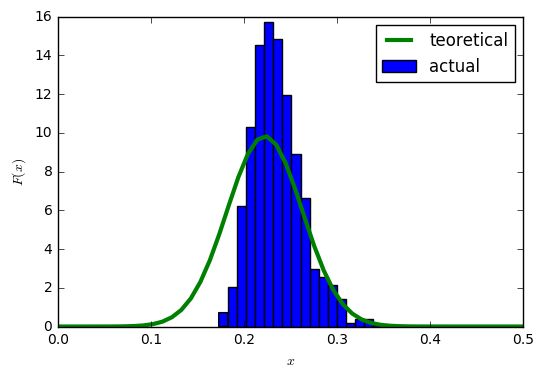

In [79]:
generate(sample_data,30)

# Выводы: 
- При увеличении объема выборки,дисперсия уменьшается;
- Видно, что при увеличении N, получаемая гистограмма больше стремится к теоретическому распределинию, что подтверждает действие ЦПТ;
- При увеличении N, стандартная ошибка среднего уменьшается.